In [1]:
import pandas as pd
import numpy as np
import os
import math
import scipy.stats
import pickle
import xgboost as xgb
import random
from re import sub
import time
import plotly.graph_objects as go

In [2]:
import tensorflow as tf
import shap

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [3]:
## options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
### Brilliant Earth
## loose diamonds
if os.path.exists(os.path.abspath('./brilliant-earth.pickle')):
    with open('brilliant-earth.pickle', 'rb') as handle:
        be_diamond_data = pickle.load(handle)
        
be_df=pd.DataFrame(data=be_diamond_data)[['shape', 'price', 'carat','cut','color', 'clarity']]
be_df['vendor'] = 'Brilliant Earth'
be_df['is_lab'] = False

## lab diamonds
if os.path.exists(os.path.abspath('./brilliant-earth-lab.pickle')):
    with open('brilliant-earth-lab.pickle', 'rb') as handle:
        be_lab_diamond_data = pickle.load(handle)
        
bel_df = pd.DataFrame(data=be_lab_diamond_data)[['shape', 'price', 'carat','cut','color', 'clarity']]
bel_df['vendor'] = 'Brilliant Earth'
bel_df['is_lab'] = True


### diamond size vs carat

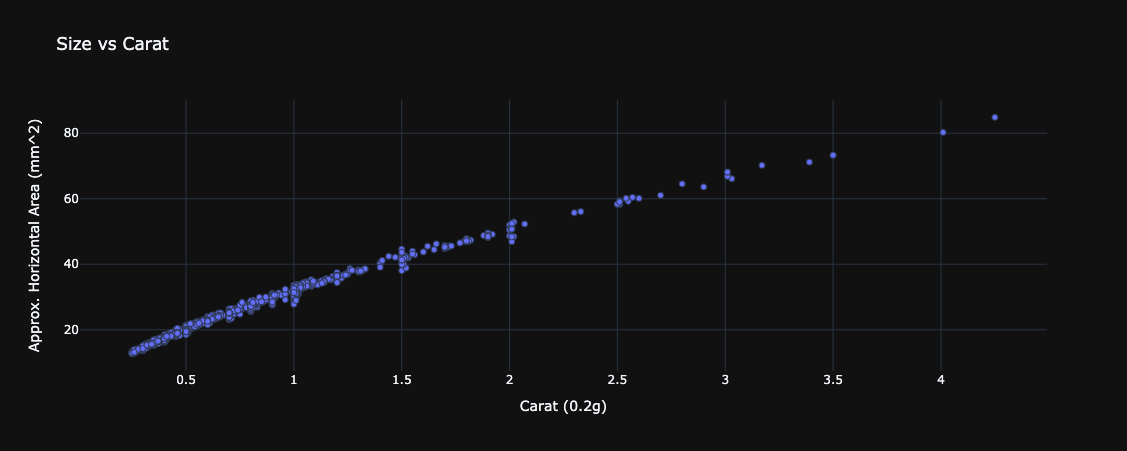

In [5]:
def get_round_diamond_area(measurement):
    measures = [float(x) for x in measurement.split(' x ')]
    x = float(measures[0])
    y = float(measures[1])
    r = (x+y)/4
    return math.pi * (r**2)

test_diamonds = be_diamond_data
test_df = pd.DataFrame(data=test_diamonds)[['carat','measurements','shape']]

# test_df.head()
graph_df = test_df[test_df['shape']=='Round'].sample(n=2000, random_state=0).reset_index(drop=True)
graph_df['horizontal_area'] = graph_df.measurements.apply(lambda x: get_round_diamond_area(x))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = graph_df.carat
        , y = graph_df.horizontal_area
        , mode='markers'
        , name='values'
        , text = ['Carat: %s<br>Measurements: %s mms'%(a,b) for a,b in graph_df.loc[:,['carat','measurements']].values]
        , hoverinfo = 'text'
        , marker=dict(
            colorscale='agsunset',
            line_width=1
        )
    )
)
 
# dark theme 
fig.layout.template = 'plotly_dark'


fig.update_layout(title = 'Size vs Carat',
                  xaxis_title='Carat (0.2g)',
                  yaxis_title='Approx. Horizontal Area (mm^2)', 
                 )

# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/be-size-vs-carat.json'))

fig.show()

### Cut and Price

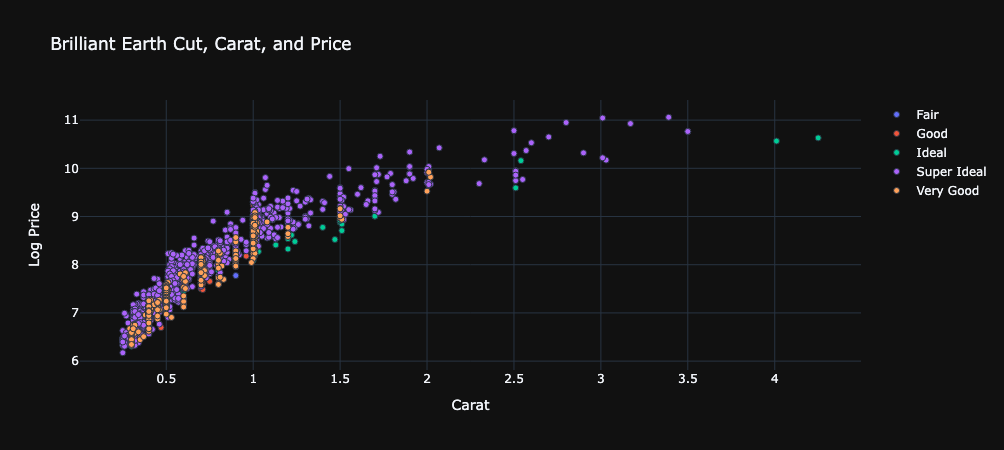

In [6]:
test_diamonds = be_diamond_data
test_df = pd.DataFrame(data=test_diamonds)[['carat','cut', 'price','shape']]

# test_df.head()
graph_df = test_df[test_df['shape']=='Round'].sample(n=2000, random_state=0).reset_index(drop=True)
graph_df['log_price'] = graph_df.price.apply(lambda x: math.log(x))

fig = go.Figure()

for cut in graph_df.cut.sort_values(ascending=True).unique():
    
    df = graph_df[graph_df.cut==cut]
    
    fig.add_trace(
        go.Scatter(
            x = df.carat
            , y = df.log_price
            , mode='markers'
            , name=cut
            , text = ['Carat: %s<br>Cut: %s<br>Price: %s'%(a,b,c) for a,b,c in df.loc[:,['carat','cut','price']].values]
            , hoverinfo = 'text'
            , marker=dict(
                colorscale='agsunset',
                line_width=1
            )
        )
    )
    
 
## dark theme 
fig.layout.template = 'plotly_dark'


fig.update_layout(title = 'Brilliant Earth Cut, Carat, and Price',
                  xaxis_title='Carat',
                  yaxis_title='Log Price', 
                 )

# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/be-cut-carat.json'))

fig.show()

### Clarity

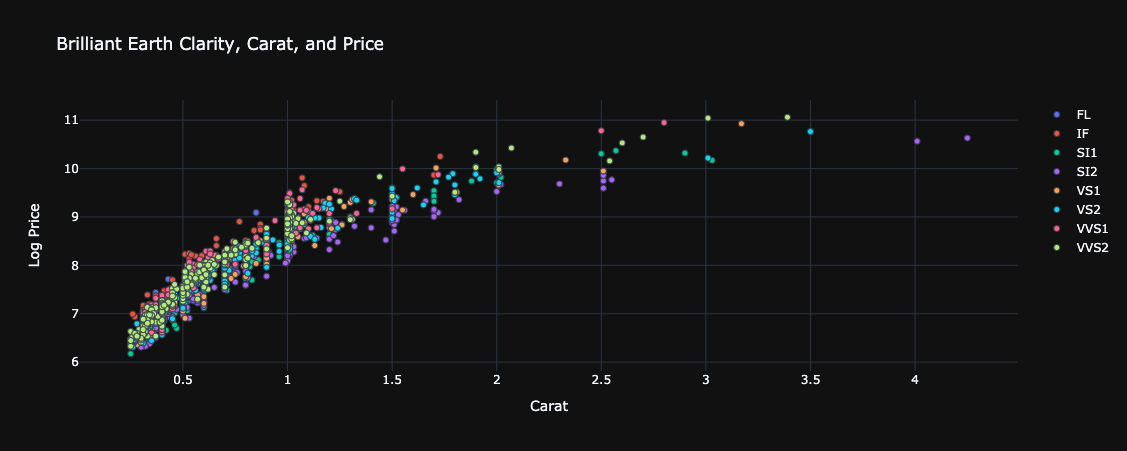

In [7]:
test_diamonds = be_diamond_data
test_df = pd.DataFrame(data=test_diamonds)[['carat','clarity', 'price','shape']]

# test_df.head()
graph_df = test_df[test_df['shape']=='Round'].sample(n=2000, random_state=0).reset_index(drop=True)
graph_df['log_price'] = graph_df.price.apply(lambda x: math.log(x))

fig = go.Figure()

for clarity in graph_df.clarity.sort_values(ascending=True).unique():
    
    df = graph_df[graph_df.clarity==clarity]
    
    fig.add_trace(
        go.Scatter(
            x = df.carat
            , y = df.log_price
            , mode='markers'
            , name=clarity
            , text = ['Carat: %s<br>Clarity: %s<br>Price: %s'%(a,b,c) for a,b,c in df.loc[:,['carat','clarity','price']].values]
            , hoverinfo = 'text'
            , marker=dict(
                colorscale='agsunset',
                line_width=1
            )
        )
    )
    
 
## dark theme 
fig.layout.template = 'plotly_dark'


fig.update_layout(title = 'Brilliant Earth Clarity, Carat, and Price',
                  xaxis_title='Carat',
                  yaxis_title='Log Price', 
                 )

# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/be-clarity-carat.json'))

fig.show()

## Color

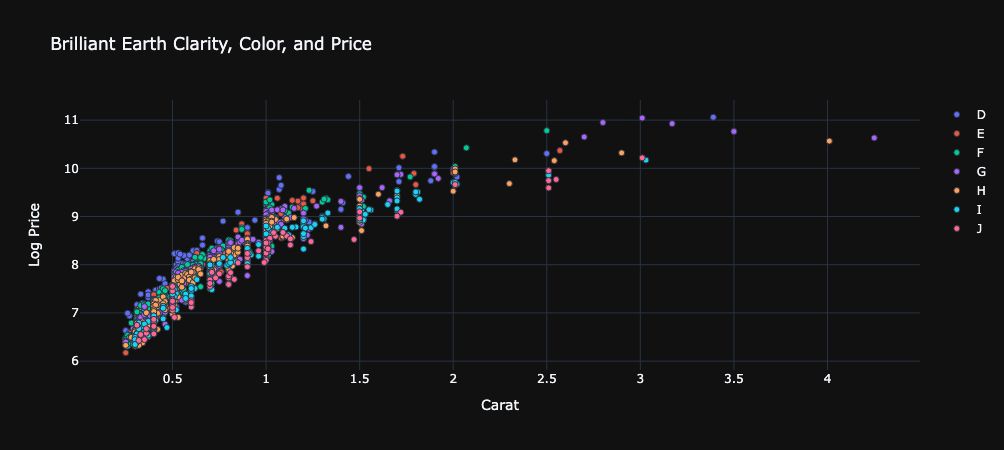

In [8]:
test_diamonds = be_diamond_data
test_df = pd.DataFrame(data=test_diamonds)[['carat','color', 'price','shape']]

# test_df.head()
graph_df = test_df[test_df['shape']=='Round'].sample(n=2000, random_state=0).reset_index(drop=True)
graph_df['log_price'] = graph_df.price.apply(lambda x: math.log(x))

fig = go.Figure()

for color in graph_df.color.sort_values(ascending=True).unique():
    
    df = graph_df[graph_df.color==color]
    
    fig.add_trace(
        go.Scatter(
            x = df.carat
            , y = df.log_price
            , mode='markers'
            , name=color
            , text = ['Carat: %s<br>Color: %s<br>Price: %s'%(a,b,c) for a,b,c in df.loc[:,['carat','color','price']].values]
            , hoverinfo = 'text'
            , marker=dict(
                colorscale='agsunset',
                line_width=1
            )
        )
    )
    
 
## dark theme 
fig.layout.template = 'plotly_dark'


fig.update_layout(title = 'Brilliant Earth Clarity, Color, and Price',
                  xaxis_title='Carat',
                  yaxis_title='Log Price', 
                 )

# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/be-color-carat.json'))

fig.show()

In [9]:
be_df.sample(1)

shape  price  carat          cut color clarity           vendor  is_lab
23421  Round    790   0.34  Super Ideal     E     SI2  Brilliant Earth   False

In [10]:
be_df.cut.unique()

array(['Super Ideal', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
### Blue Nile
if os.path.exists(os.path.abspath('./blue-nile.pickle')):
    with open('blue-nile.pickle', 'rb') as handle:
        bn_diamond_data = pickle.load(handle)

bn_df_raw = pd.DataFrame(data = bn_diamond_data)[['shapeName','price','carat','cut','color','clarity']]

bn_df = pd.DataFrame()
bn_df['shape'] = bn_df_raw.shapeName.apply(lambda x: x[0])
bn_df['price'] = bn_df_raw.price.apply(lambda x: float(sub(r'[^\d.]', '', x[0])))
bn_df['carat'] = bn_df_raw.carat.apply(lambda x: x[0])
bn_df['cut'] = bn_df_raw.cut.apply(lambda x: x[0]['label']).map({
    'Good': 'Good', 
    'Very Good': 'Very Good',
    'Ideal': 'Ideal',
    'Astor Ideal': 'Super Ideal',
})
bn_df['color'] = bn_df_raw.color.apply(lambda x: x[0])
bn_df['clarity'] = bn_df_raw.clarity.apply(lambda x: x[0])
bn_df['vendor'] = 'Blue Nile'
bn_df['is_lab'] = False

In [12]:
bn_df.head()

shape  price carat        cut color clarity     vendor  is_lab
0  Round  250.0  0.23  Very Good     E     SI1  Blue Nile   False
1  Round  277.0  0.23  Very Good     F     SI1  Blue Nile   False
2  Round  277.0  0.23  Very Good     F     SI1  Blue Nile   False
3  Round  280.0  0.23  Very Good     D     SI1  Blue Nile   False
4  Round  286.0  0.23       Good     D     SI2  Blue Nile   False

In [13]:
### James Allen
## loose diammonds
if os.path.exists(os.path.abspath('./james-allen.pickle')):
    with open('james-allen.pickle', 'rb') as handle:
        ja_diamond_data = pickle.load(handle)
        

ja_df = pd.DataFrame(data=ja_diamond_data)[['stone','price']]

ja_df['clarity'] = ja_df.stone.apply(lambda x: x['clarity']['name'])
ja_df['shape'] = ja_df.stone.apply(lambda x: x['shape']['name']).map({'round':'Round'})
ja_df['color'] = ja_df.stone.apply(lambda x: x['color']['name'])
ja_df['cut'] = ja_df.stone.apply(lambda x: x['cut']['name']).map({
    'Good': 'Good', 
    'Very Good': 'Very Good',
    'Ideal': 'Ideal',
    'True Hearts': 'Super Ideal',
    'Excellent': 'Very Good',
})
ja_df['carat'] = ja_df.stone.apply(lambda x: x['carat'])
ja_df['vendor'] = 'James Allen'
ja_df['is_lab'] = False

## lab diamonds
if os.path.exists(os.path.abspath('./james-allen-lab.pickle')):
    with open('james-allen-lab.pickle', 'rb') as handle:
        ja_lab_diamond_data = pickle.load(handle)

jal_df = pd.DataFrame(data=ja_lab_diamond_data)[['stone','price']]

jal_df['clarity'] = jal_df.stone.apply(lambda x: x['clarity']['name'])
jal_df['shape'] = jal_df.stone.apply(lambda x: x['shape']['name']).map({'round':'Round'})
jal_df['color'] = jal_df.stone.apply(lambda x: x['color']['name'])
jal_df['cut'] = jal_df.stone.apply(lambda x: x['cut']['name']).map({
    'Good': 'Good', 
    'Very Good': 'Very Good',
    'Ideal': 'Ideal',
    'True Hearts': 'Super Ideal',
    'Excellent': 'Very Good',
})
jal_df['carat'] = jal_df.stone.apply(lambda x: x['carat'])
jal_df['vendor'] = 'James Allen'
jal_df['is_lab'] = True


In [14]:
## put it all together
diamond_df = be_df.append([bel_df, bn_df, ja_df, jal_df])\
    [['shape','price','carat','cut','color','clarity','vendor','is_lab']]\
    .reset_index(drop=True)

diamond_df['price'] = diamond_df.price.astype(float)
diamond_df['carat'] = diamond_df.carat.astype(float)
diamond_df['log_price'] = diamond_df.price.apply(lambda x: math.log(x))

In [15]:
print(diamond_df.shape)

(576820, 9)


In [16]:
print(diamond_df.sample(n=5, random_state=0).to_markdown())

|        | shape    |   price |   carat | cut         | color   | clarity   | vendor          | is_lab   |   log_price |
|-------:|:---------|--------:|--------:|:------------|:--------|:----------|:----------------|:---------|------------:|
|   6412 | Round    |     740 |    0.3  | Ideal       | F       | SI1       | Brilliant Earth | False    |     6.60665 |
|  34866 | Round    |    1110 |    0.4  | Ideal       | F       | SI1       | Brilliant Earth | False    |     7.01212 |
| 164602 | Round    |    2020 |    1.2  | Super Ideal | J       | VS1       | Brilliant Earth | True     |     7.61085 |
|  45097 | Marquise |    1220 |    0.5  | Good        | H       | SI1       | Brilliant Earth | False    |     7.10661 |
| 481003 | Round    |    3720 |    1.04 | Very Good   | F       | I1        | James Allen     | False    |     8.22148 |


In [17]:
diamond_df.describe()

price          carat      log_price
count  576816.000000  576820.000000  576816.000000
mean     4130.012807       0.891218       7.694578
std      7627.499091       0.590134       1.037803
min       245.000000       0.180000       5.501258
25%       990.000000       0.500000       6.897705
50%      2090.000000       0.730000       7.644919
75%      4200.000000       1.090000       8.342840
max    432810.000000       5.000000      12.978054

In [18]:
diamond_df.price.sort_values(ascending=True).head()

209184    245.0
314744    250.0
205466    250.0
304743    250.0
304744    250.0
Name: price, dtype: float64

### relationship between carat and price

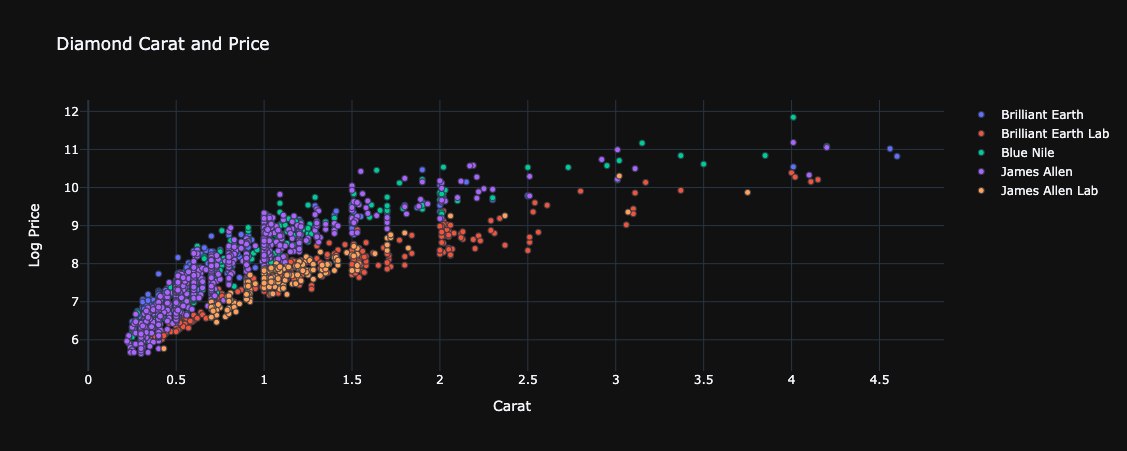

In [19]:
### plot it?
graph_df = diamond_df.sample(2000, random_state=0)

# Define indices corresponding to flower categories, using pandas label encoding
index_vals = graph_df['vendor'].astype('category').cat.codes

fig = go.Figure()

fig.add_trace(
    go.Scatter(
    x = graph_df[(graph_df.vendor=='Brilliant Earth') & (graph_df.is_lab==False)].carat
    , y = graph_df[(graph_df.vendor=='Brilliant Earth') & (graph_df.is_lab==False)].log_price
    , name = 'Brilliant Earth'
    , text = ['Log Price: %s<br>Price: %s<br>Shape: %s<br>Carat: %s<br>Cut: %s<br>Color: %s<br>Clarity: %s<br>Vendor: %s<br>is_lab: %s'%(a,b,c,d,e,f,g,h,i) for a,b,c,d,e,f,g,h,i in graph_df[(graph_df.vendor=='Brilliant Earth') & (graph_df.is_lab==False)].loc[:,['log_price','price','shape','carat','cut','color','clarity','vendor','is_lab']].values]
    , hoverinfo = 'text'
    , mode='markers'
    ,  marker=dict(
        colorscale='agsunset',
        line_width=1
    )
    )
)

fig.add_trace(
    go.Scatter(
    x = graph_df[(graph_df.vendor=='Brilliant Earth') & (graph_df.is_lab==True)].carat
    , y = graph_df[(graph_df.vendor=='Brilliant Earth') & (graph_df.is_lab==True)].log_price
    , name = 'Brilliant Earth Lab'
    , text = ['Log Price: %s<br>Price: %s<br>Shape: %s<br>Carat: %s<br>Cut: %s<br>Color: %s<br>Clarity: %s<br>Vendor: %s<br>is_lab: %s'%(a,b,c,d,e,f,g,h,i) for a,b,c,d,e,f,g,h,i in graph_df[(graph_df.vendor=='Brilliant Earth') & (graph_df.is_lab==True)].loc[:,['log_price','price','shape','carat','cut','color','clarity','vendor','is_lab']].values]
    , hoverinfo = 'text'
    , mode='markers'
    ,  marker=dict(
        colorscale='agsunset',
        line_width=1
    )
    )
)

fig.add_trace(
    go.Scatter(
    x = graph_df[graph_df.vendor=='Blue Nile'].carat
    , y = graph_df[graph_df.vendor=='Blue Nile'].log_price
    , name = 'Blue Nile'
    , text = ['Log Price: %s<br>Price: %s<br>Shape: %s<br>Carat: %s<br>Cut: %s<br>Color: %s<br>Clarity: %s<br>Vendor: %s<br>is_lab: %s'%(a,b,c,d,e,f,g,h,i) for a,b,c,d,e,f,g,h,i in graph_df[graph_df.vendor=='Blue Nile'].loc[:,['log_price','price','shape','carat','cut','color','clarity','vendor','is_lab']].values]
    , hoverinfo = 'text'
    , mode='markers'
    ,  marker=dict(
        colorscale='agsunset',
        line_width=1
    )
    )
)

fig.add_trace(
    go.Scatter(
    x = graph_df[(graph_df.vendor=='James Allen') & (graph_df.is_lab==False)].carat
    , y = graph_df[(graph_df.vendor=='James Allen') & (graph_df.is_lab==False)].log_price
    , name = 'James Allen'
    , text = ['Log Price: %s<br>Price: %s<br>Shape: %s<br>Carat: %s<br>Cut: %s<br>Color: %s<br>Clarity: %s<br>Vendor: %s<br>is_lab: %s'%(a,b,c,d,e,f,g,h,i) for a,b,c,d,e,f,g,h,i in graph_df[(graph_df.vendor=='James Allen') & (graph_df.is_lab==False)].loc[:,['log_price','price','shape','carat','cut','color','clarity','vendor','is_lab']].values]
    , hoverinfo = 'text'
    , mode='markers'
    ,  marker=dict(
        colorscale='agsunset',
        line_width=1
    )
    )
)

fig.add_trace(
    go.Scatter(
    x = graph_df[(graph_df.vendor=='James Allen') & (graph_df.is_lab==True)].carat
    , y = graph_df[(graph_df.vendor=='James Allen') & (graph_df.is_lab==True)].log_price
    , name = 'James Allen Lab'
    , text = ['Log Price: %s<br>Price: %s<br>Shape: %s<br>Carat: %s<br>Cut: %s<br>Color: %s<br>Clarity: %s<br>Vendor: %s<br>is_lab: %s'%(a,b,c,d,e,f,g,h,i) for a,b,c,d,e,f,g,h,i in graph_df[(graph_df.vendor=='James Allen') & (graph_df.is_lab==True)].loc[:,['log_price','price','shape','carat','cut','color','clarity','vendor','is_lab']].values]
    , hoverinfo = 'text'
    , mode='markers'
    ,  marker=dict(
        colorscale='agsunset',
        line_width=1
    )
    )
)

# dark theme 
fig.layout.template = 'plotly_dark'

fig.update_layout(title = 'Diamond Carat and Price',
                  xaxis_title='Carat',
                  yaxis_title='Log Price', 
                 )

# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/diamond-carat-price-chart.json'))

fig.show()

In [20]:
r = scipy.stats.pearsonr(graph_df.log_price, graph_df.carat)

print(r, r[0]**2)

(0.8210200030141874, 0.0) 0.6740738453494163


### Regression on Log Price

In [21]:
# transform diamond data
diamond_df_t = pd.get_dummies(data=diamond_df, prefix='', prefix_sep='')
diamond_df_t.is_lab = diamond_df_t.is_lab.map({True:1, False:0})

# rid ourselves of any nans 
# drop categories to avoid collinearity
diamond_df_t = diamond_df_t[~np.any(np.isnan(diamond_df_t),1)]\
    .drop(['Fair', 'K', 'I1' , 'Blue Nile','Emerald', 'price'], axis=1)

print(diamond_df_t.shape)
diamond_df_t.head()

(576816, 33)


carat  is_lab  log_price  Asscher  Cushion  Heart  Marquise  Oval  Pear  \
0   0.25       0   6.173786        0        0      0         0     0     0   
1   0.25       0   6.173786        0        0      0         0     0     0   
2   0.25       0   6.173786        0        0      0         0     0     0   
3   0.25       0   6.173786        0        0      0         0     0     0   
4   0.25       0   6.173786        0        0      0         0     0     0   

   Princess  Radiant  Round  Good  Ideal  Super Ideal  Very Good  D  E  F  G  \
0         0        0      1     0      0            1          0  0  0  1  0   
1         0        0      1     0      0            1          0  0  1  0  0   
2         0        0      1     0      0            1          0  0  0  1  0   
3         0        0      1     0      0            1          0  0  0  0  1   
4         0        0      1     0      0            1          0  0  0  0  1   

   H  I  J  FL  IF  SI1  SI2  VS1  VS2  VVS1  VVS2  Brilliant Earth  \
0  0  0  0   0   0    0    0    1    0     0     0                1   
1  0  0  0   0   0    1    0    0    0     0     0                1   
2  0  0  0   0   0    1    0    0    0     0     0                1   
3  0  0  0   0   0    0    0    0    1     0     0                1   
4  0  0  0   0   0    0    0    0    1     0     0                1   

   James Allen  
0            0  
1            0  
2            0  
3            0  
4            0

In [22]:
## test and train
train_dataset = diamond_df_t.copy().sample(frac=0.8, random_state=0)
test_dataset = diamond_df_t.copy().drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('log_price')
test_labels = test_features.pop('log_price')

train_dataset.shape

(461453, 33)

In [23]:
import statsmodels.api as sm
from scipy import stats

train_features2 = sm.add_constant(train_features)

mod = sm.OLS(train_labels, train_features2)
results = mod.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 7.073e+04
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:30:28   Log-Likelihood:            -2.6180e+05
No. Observations:              461453   AIC:                         5.237e+05
Df Residuals:                  461420   BIC:                         5.240e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1746      0.020    2

In [24]:
r_df = pd.DataFrame(data = {
    'coefficients': results.params.values,
    }
    , index=results.params.index
)
r_df['p_delta'] = r_df.coefficients.apply(lambda x: (math.exp(x)-1))
r_df['p_delta_low'] = results.conf_int()[0].apply(lambda x: (math.exp(x)-1))
r_df['p_delta_high'] = results.conf_int()[1].apply(lambda x: (math.exp(x)-1))


# results.params.index
print(r_df.to_markdown())

|                 |   coefficients |     p_delta |   p_delta_low |   p_delta_high |
|:----------------|---------------:|------------:|--------------:|---------------:|
| const           |      5.17457   | 175.721     |  168.81       |   182.912      |
| carat           |      1.69683   |   4.45664   |    4.44405    |     4.46925    |
| is_lab          |     -0.857427  |  -0.575748  |   -0.577416   |    -0.574073   |
| Asscher         |      0.0756715 |   0.0786082 |    0.0495655  |     0.108455   |
| Cushion         |      0.095304  |   0.0999932 |    0.0853125  |     0.114872   |
| Heart           |      0.186117  |   0.204563  |    0.176488   |     0.233308   |
| Marquise        |      0.191853  |   0.211492  |    0.188484   |     0.234946   |
| Oval            |      0.143012  |   0.153743  |    0.142098   |     0.165508   |
| Pear            |      0.183312  |   0.201189  |    0.187516   |     0.21502    |
| Princess        |      0.0126225 |   0.0127025 |    1.9579e-05 |     0.025

In [25]:
### just colors
print(r_df.loc[['D','E','F','G','H','I','J'],:].to_markdown())

|    |   coefficients |   p_delta |   p_delta_low |   p_delta_high |
|:---|---------------:|----------:|--------------:|---------------:|
| D  |       0.639936 |  0.89636  |      0.882364 |       0.91046  |
| E  |       0.582988 |  0.791384 |      0.778265 |       0.804599 |
| F  |       0.57684  |  0.780404 |      0.767219 |       0.793686 |
| G  |       0.58371  |  0.792677 |      0.779356 |       0.806098 |
| H  |       0.522322 |  0.685938 |      0.673091 |       0.698884 |
| I  |       0.371373 |  0.449724 |      0.438495 |       0.46104  |
| J  |       0.229027 |  0.257376 |      0.247357 |       0.267475 |


In [26]:
### Just clarity
print(r_df.loc[['SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL'],:].to_markdown())

|      |   coefficients |   p_delta |   p_delta_low |   p_delta_high |
|:-----|---------------:|----------:|--------------:|---------------:|
| SI2  |       0.212314 |  0.236536 |      0.224104 |       0.249095 |
| SI1  |       0.350047 |  0.419135 |      0.405037 |       0.433374 |
| VS2  |       0.498421 |  0.646119 |      0.629712 |       0.662692 |
| VS1  |       0.552021 |  0.736759 |      0.719385 |       0.754309 |
| VVS2 |       0.590518 |  0.804923 |      0.786533 |       0.823502 |
| VVS1 |       0.617705 |  0.854667 |      0.835036 |       0.874508 |
| IF   |       0.700981 |  1.01573  |      0.992236 |       1.0395   |
| FL   |       1.24614  |  2.47691  |      2.39217  |       2.56376  |


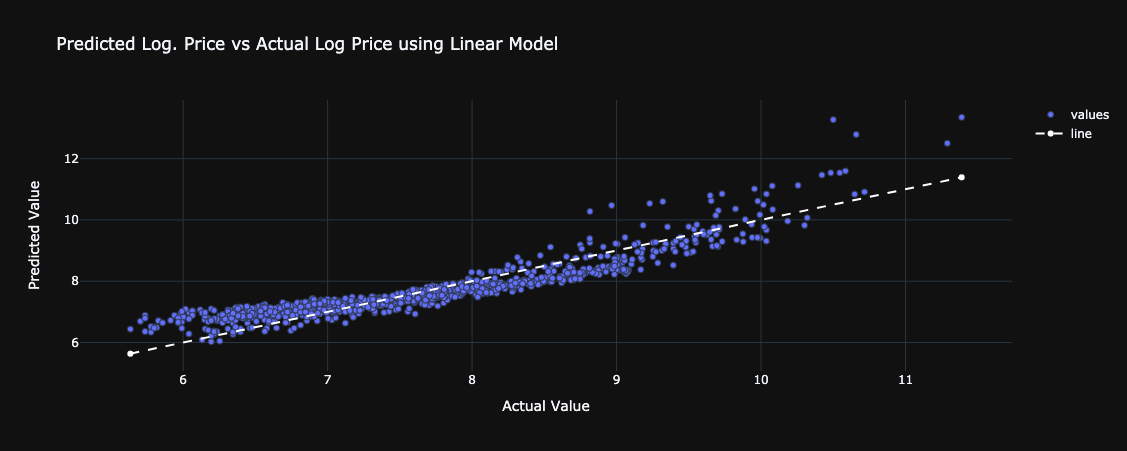

In [27]:
graph_df = pd.DataFrame(data={
    'actual_price': test_labels.values,
    'predicted_price': results.predict(sm.add_constant(test_features))
}).sample(1000, random_state=0)


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = graph_df.actual_price
        , y = graph_df.predicted_price
        , mode='markers'
        , name='values'
        , marker=dict(
            colorscale='agsunset',
            line_width=1
        )
    )
)
 
fig.add_trace(
    go.Scatter(
        x=[graph_df.actual_price.min(), graph_df.actual_price.max()]
        , y = [graph_df.actual_price.min(), graph_df.actual_price.max()]
        , name='line'
        , line=dict(
            dash='dash', 
            color='white',
        )
    )
)

# dark theme 
fig.layout.template = 'plotly_dark'


fig.update_layout(title = 'Predicted Log. Price vs Actual Log Price using Linear Model',
                  xaxis_title='Actual Value',
                  yaxis_title='Predicted Value', 
                 )

# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/lm-prediction-chart.json'))

fig.show()

In [28]:
### calc mse
mse = sum((graph_df.actual_price - graph_df.predicted_price)**2)/graph_df.shape[0]
r = scipy.stats.pearsonr(graph_df.actual_price, graph_df.predicted_price)

print(mse, r[0]**2)

0.17309662581335333 0.8389552879111449


### XGB

In [29]:
### don't need to worry about multicollinearity with tree model
# transform diamond data
diamond_df_t = pd.get_dummies(data=diamond_df, prefix='', prefix_sep='')
diamond_df_t.is_lab = diamond_df_t.is_lab.map({True:1, False:0})

# rid ourselves of any nans 
# drop categories to avoid collinearity
diamond_df_t = diamond_df_t[~np.any(np.isnan(diamond_df_t),1)]\
    .drop(['price'], axis=1)

print(diamond_df_t.shape)
diamond_df_t.head()

(576816, 38)


carat  is_lab  log_price  Asscher  Cushion  Emerald  Heart  Marquise  Oval  \
0   0.25       0   6.173786        0        0        0      0         0     0   
1   0.25       0   6.173786        0        0        0      0         0     0   
2   0.25       0   6.173786        0        0        0      0         0     0   
3   0.25       0   6.173786        0        0        0      0         0     0   
4   0.25       0   6.173786        0        0        0      0         0     0   

   Pear  Princess  Radiant  Round  Fair  Good  Ideal  Super Ideal  Very Good  \
0     0         0        0      1     0     0      0            1          0   
1     0         0        0      1     0     0      0            1          0   
2     0         0        0      1     0     0      0            1          0   
3     0         0        0      1     0     0      0            1          0   
4     0         0        0      1     0     0      0            1          0   

   D  E  F  G  H  I  J  K  FL  I1  IF  SI1  SI2  VS1  VS2  VVS1  VVS2  \
0  0  0  1  0  0  0  0  0   0   0   0    0    0    1    0     0     0   
1  0  1  0  0  0  0  0  0   0   0   0    1    0    0    0     0     0   
2  0  0  1  0  0  0  0  0   0   0   0    1    0    0    0     0     0   
3  0  0  0  1  0  0  0  0   0   0   0    0    0    0    1     0     0   
4  0  0  0  1  0  0  0  0   0   0   0    0    0    0    1     0     0   

   Blue Nile  Brilliant Earth  James Allen  
0          0                1            0  
1          0                1            0  
2          0                1            0  
3          0                1            0  
4          0                1            0

In [30]:
## test and train
train_dataset = diamond_df_t.copy().sample(frac=0.8, random_state=0)
test_dataset = diamond_df_t.copy().drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('log_price')
test_labels = test_features.pop('log_price')

In [31]:
# ## cross validation dmatrix
y = test_labels.append(train_labels).reset_index(drop=True)
X = test_features.append(train_features).reset_index(drop=True)

cv_dmatrix = xgb.DMatrix(data=X,label=y)

In [32]:
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    colsample_bytree = 0.3, 
    learning_rate = 0.1,
    max_depth = 4, 
    alpha = 10, 
    n_estimators = 500,
    base_score = 0
)

In [33]:
xg_reg.fit(train_features, train_labels)

XGBRegressor(alpha=10, base_score=0, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Well, how is it?

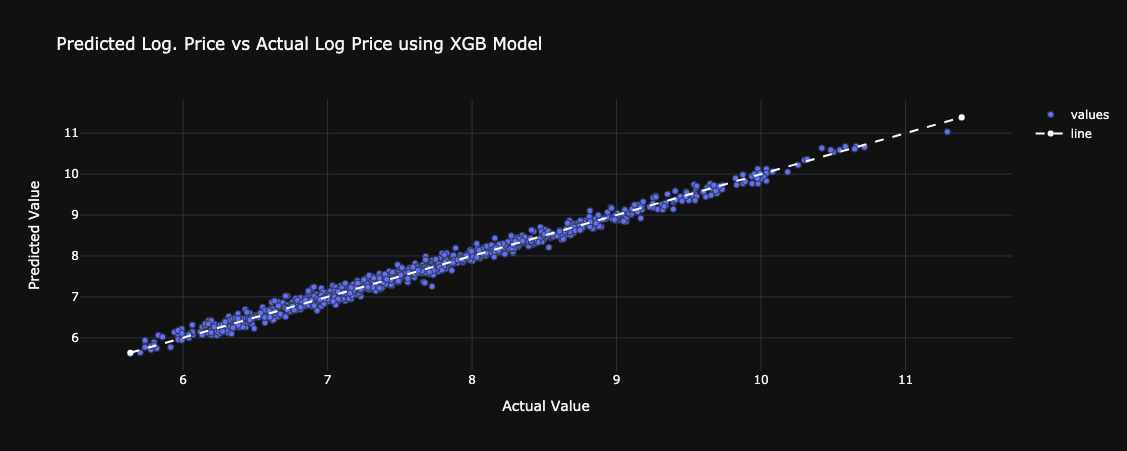

In [34]:
graph_df = pd.DataFrame(data={
    'actual_price': test_labels.values,
    'predicted_price': xg_reg.predict(test_features)
}).sample(1000, random_state=0)

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = graph_df.actual_price
        , y = graph_df.predicted_price
        , mode='markers'
        , name='values'
        , marker=dict(
            colorscale='agsunset',
            line_width=1
        )
    )
)
 
fig.add_trace(
    go.Scatter(
        x=[graph_df.actual_price.min(), graph_df.actual_price.max()]
        , y = [graph_df.actual_price.min(), graph_df.actual_price.max()]
        , name='line'
        , line=dict(
            dash='dash', 
            color='white',
        )
    )
)

# dark theme 
fig.layout.template = 'plotly_dark'


fig.update_layout(title = 'Predicted Log. Price vs Actual Log Price using XGB Model',
                  xaxis_title='Actual Value',
                  yaxis_title='Predicted Value', 
                 )
# save file to html
fig.write_json(os.path.abspath('../../personal-site/static/plotly/diamonds-forever/xgb-prediction-chart.json'))

fig.show()

In [35]:
### calc mse
mse = sum((graph_df.actual_price - graph_df.predicted_price)**2)/graph_df.shape[0]
r = scipy.stats.pearsonr(graph_df.actual_price, graph_df.predicted_price)

print(mse, r[0]**2)

0.011385667418838194 0.9893811208695577


Explaining things with SHAP

In [36]:
shap_test_features = test_features.sample(n=5000, random_state=0)
shap_values = shap.TreeExplainer(xg_reg).shap_values(shap_test_features)

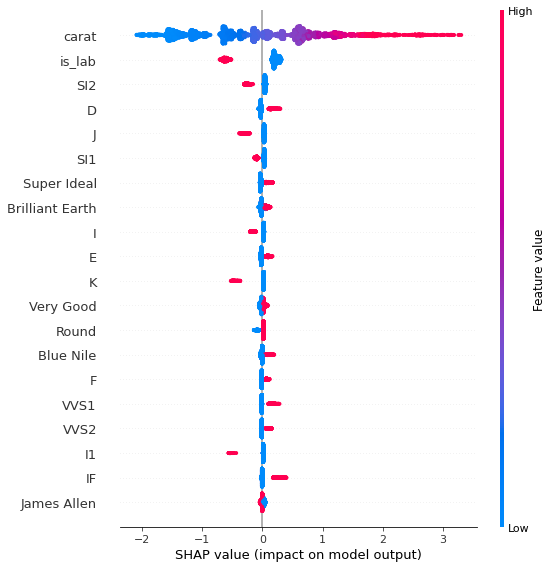

In [37]:
shap.summary_plot(shap_values, shap_test_features)

A couple single values

In [38]:
random.seed(a=0)
r_int1 = random.randint(0,999)
r_int2 = random.randint(0,999)
r_int3 = random.randint(0,999)

shap_xgb_model = shap.TreeExplainer(xg_reg)

In [39]:
shap.initjs()

In [109]:
## example 1
print(shap_test_features.iloc[r_int1,:].to_markdown())
shap.force_plot(shap_xgb_model.expected_value, shap_values[r_int1,:], shap_test_features.iloc[r_int1,:])

|                 |   131099 |
|:----------------|---------:|
| carat           |     0.62 |
| is_lab          |     1    |
| Asscher         |     0    |
| Cushion         |     0    |
| Emerald         |     1    |
| Heart           |     0    |
| Marquise        |     0    |
| Oval            |     0    |
| Pear            |     0    |
| Princess        |     0    |
| Radiant         |     0    |
| Round           |     0    |
| Fair            |     0    |
| Good            |     0    |
| Ideal           |     0    |
| Super Ideal     |     1    |
| Very Good       |     0    |
| D               |     0    |
| E               |     0    |
| F               |     0    |
| G               |     0    |
| H               |     1    |
| I               |     0    |
| J               |     0    |
| K               |     0    |
| FL              |     0    |
| I1              |     0    |
| IF              |     0    |
| SI1             |     0    |
| SI2             |     0    |
| VS1   

In [41]:
## example 2 
print(shap_test_features.iloc[r_int2,:].T)
shap.force_plot(shap_xgb_model.expected_value, shap_values[r_int2,:], shap_test_features.iloc[r_int2,:])

carat              1.0
is_lab             0.0
Asscher            0.0
Cushion            0.0
Emerald            0.0
Heart              0.0
Marquise           0.0
Oval               0.0
Pear               0.0
Princess           0.0
Radiant            0.0
Round              1.0
Fair               0.0
Good               1.0
Ideal              0.0
Super Ideal        0.0
Very Good          0.0
D                  0.0
E                  0.0
F                  0.0
G                  0.0
H                  1.0
I                  0.0
J                  0.0
K                  0.0
FL                 0.0
I1                 0.0
IF                 0.0
SI1                0.0
SI2                0.0
VS1                0.0
VS2                1.0
VVS1               0.0
VVS2               0.0
Blue Nile          0.0
Brilliant Earth    0.0
James Allen        1.0
Name: 457703, dtype: float64


In [42]:
## example 3
print(shap_test_features.iloc[r_int2,:].T)
shap.force_plot(shap_xgb_model.expected_value, shap_values[r_int3,:], shap_test_features.iloc[r_int3,:])

carat              1.0
is_lab             0.0
Asscher            0.0
Cushion            0.0
Emerald            0.0
Heart              0.0
Marquise           0.0
Oval               0.0
Pear               0.0
Princess           0.0
Radiant            0.0
Round              1.0
Fair               0.0
Good               1.0
Ideal              0.0
Super Ideal        0.0
Very Good          0.0
D                  0.0
E                  0.0
F                  0.0
G                  0.0
H                  1.0
I                  0.0
J                  0.0
K                  0.0
FL                 0.0
I1                 0.0
IF                 0.0
SI1                0.0
SI2                0.0
VS1                0.0
VS2                1.0
VVS1               0.0
VVS2               0.0
Blue Nile          0.0
Brilliant Earth    0.0
James Allen        1.0
Name: 457703, dtype: float64


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


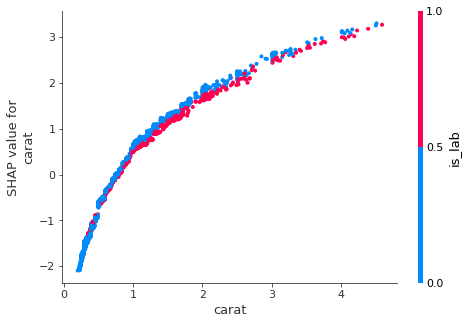

In [43]:
# relationship with carat
shap.dependence_plot('carat', shap_values, shap_test_features)

In [44]:
# get interaction values
shap_interaction_values = shap.TreeExplainer(xg_reg).shap_interaction_values(shap_test_features)

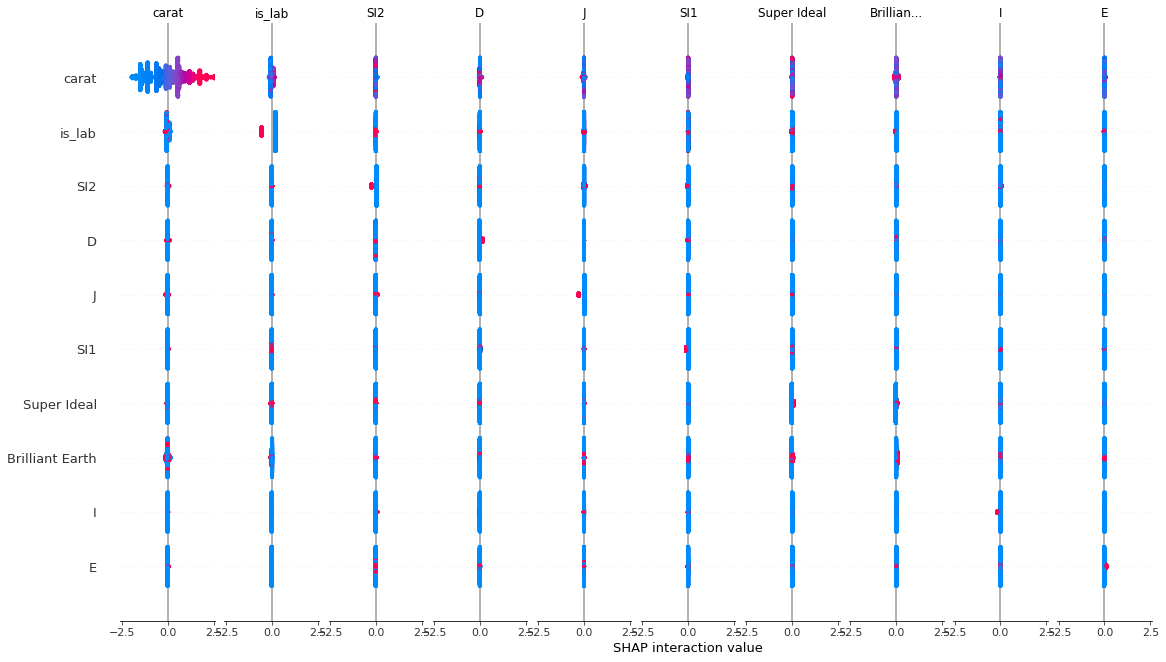

In [106]:
shap.summary_plot(shap_interaction_values, features=shap_test_features, max_display=10)

In [88]:
# help(shap.dependence_plot)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


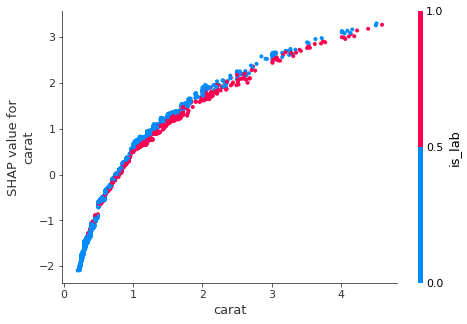

In [93]:
# relationship with carat
shap.dependence_plot(ind='carat', shap_values=shap_values, features=shap_test_features, interaction_index='is_lab')

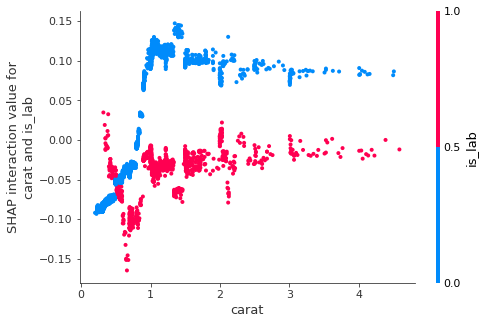

In [82]:
# lab and carat
shap.dependence_plot(('carat','is_lab'), shap_interaction_values, shap_test_features)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


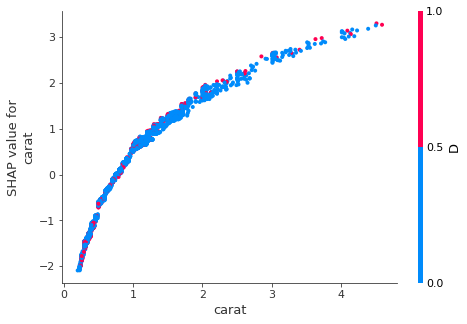

In [95]:
# carat and color
shap.dependence_plot(ind='carat', shap_values=shap_values, features=shap_test_features, interaction_index='D')

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


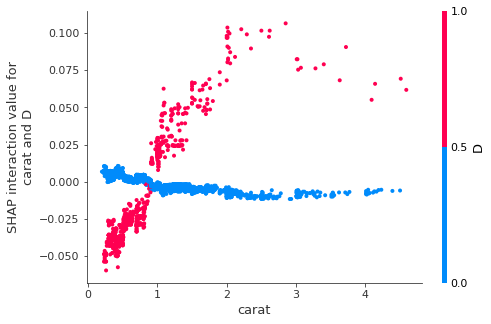

In [96]:
shap.dependence_plot(('carat','D'), shap_interaction_values, shap_test_features)

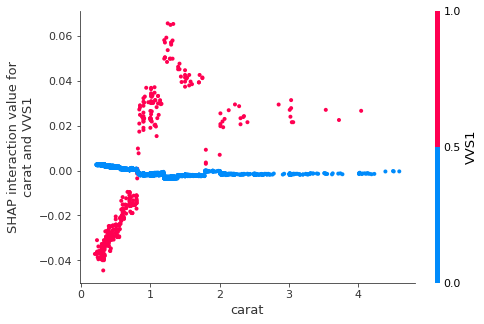

In [77]:
# carat and clarity
shap.dependence_plot(('carat','VVS1'), shap_interaction_values, shap_test_features)

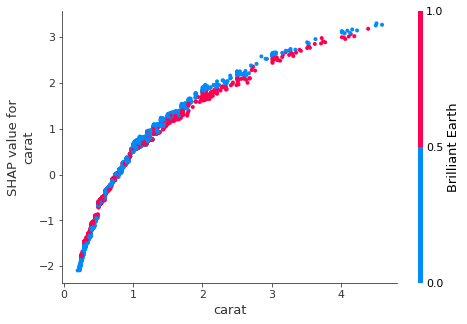

In [97]:
shap.dependence_plot(ind='carat', shap_values=shap_values, features=shap_test_features, interaction_index='Brilliant Earth')

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


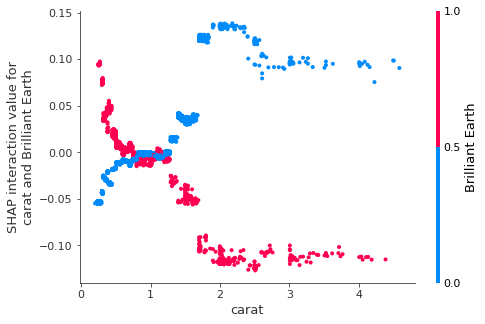

In [98]:
# carat and brilliant earth
shap.dependence_plot(('carat','Brilliant Earth'), shap_interaction_values, shap_test_features)

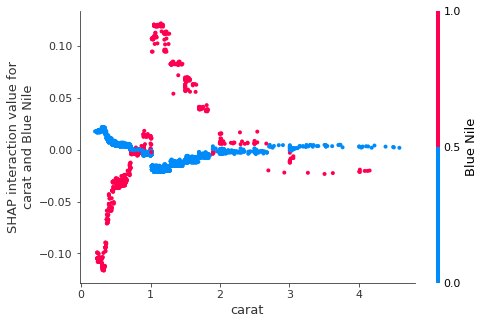

In [47]:
# carat and Blue Nile
shap.dependence_plot(('carat','Blue Nile'), shap_interaction_values, shap_test_features)

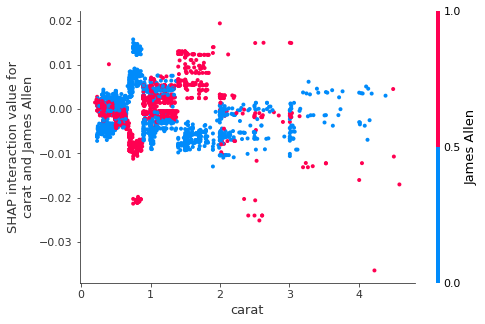

In [78]:
# carat and james allend
shap.dependence_plot(('carat','James Allen'), shap_interaction_values, shap_test_features)

### Fun with Tensorflow

basically just following [this tutorial](https://www.tensorflow.org/tutorials/keras/regression)

In [48]:
# ## test and train
# train_dataset = diamond_df_t.copy().sample(frac=0.8, random_state=0)
# test_dataset = diamond_df_t.copy().drop(train_dataset.index)


In [49]:
# print(train_dataset.shape, test_dataset.shape)

In [50]:
# ## test and train
# ## only using 100k samples to train
# train_dataset = diamond_df_t.sample(n=100000, random_state=0)
# test_dataset = diamond_df_t.drop(train_dataset.index)

# train_features = train_dataset.copy()
# test_features = test_dataset.copy()

# train_labels = train_features.pop('log_price')
# test_labels = test_features.pop('log_price')

# train_dataset.shape

In [51]:
# ## Normalization

# # create normalization layer
# normalizer = preprocessing.Normalization()
# # apply normalization to training data
# normalizer.adapt(np.array(train_features))

# first = np.array(train_features[:1])

# with np.printoptions(precision=2, suppress=True):
#   print('First example:', first,'\n')
#   print('Normalized:', normalizer(first).numpy())

### DNN Model

In [52]:
# def build_and_compile_model(norm):
#     model = keras.Sequential([
#         norm,
#         layers.Dense(64, activation='relu'),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(1)
#     ])

#     model.compile(loss='mean_absolute_error',
#         optimizer=tf.keras.optimizers.Adam(0.001))
#     return model

In [53]:
# dnn_model = build_and_compile_model(normalizer)
# dnn_model.summary()

In [54]:
# %%time
# history = dnn_model.fit(
#     train_features, train_labels,
#     validation_split=0.2,
#     verbose=0, epochs=100)

In [55]:
# ### plot loss
# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x = [n for n in range(1,101)]
#         , y = history.history['loss']
#         , name = 'loss'
#         , marker=dict(
#             colorscale='agsunset',
#             line_width=1
#         )
        
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x = [n for n in range(1,101)]
#         , y = history.history['val_loss']
#         , name = 'val_loss'
#         , marker=dict(
#             colorscale='agsunset',
#             line_width=1
#         )
        
#     )
# )

# # dark theme 
# fig.layout.template = 'plotly_dark'


# fig.update_layout(title = 'DNN Regression Model Loss',
#                   xaxis_title='Epoch',
#                   yaxis_title='Error[Log Price]', 
#                  )

# fig.show()

In [56]:
# ### predictions 
# test_predictions = dnn_model.predict(test_features).flatten()


In [57]:
# graph_df = pd.DataFrame(data = {
#     'actual_price': test_labels, 
#     'predicted_price': test_predictions
#     }
# ).sample(n=1000, random_state=0)

# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x = graph_df.actual_price
#         , y = graph_df.predicted_price
#         , mode='markers'
#         , name='values'
#         , marker=dict(
#             colorscale='agsunset',
#             line_width=1,
#         )
#     )
# )
 
# fig.add_trace(
#     go.Scatter(
#         x=[graph_df.actual_price.min(), graph_df.actual_price.max()]
#         , y = [graph_df.predicted_price.min(), graph_df.predicted_price.max()]
#         , name='line'
#         , line=dict(
#             dash='dash', 
#             color='white',
#         )
#     )
# )

# # dark theme 
# fig.layout.template = 'plotly_dark'


# fig.update_layout(title = 'Predicted Log. Price vs Actual Log Price',
#                   xaxis_title='Actual Value',
#                   yaxis_title='Predicted Value', 
#                  )

# fig.show()

In [58]:
# ### calc mse
# mse = sum((graph_df.actual_price - graph_df.predicted_price)**2)/graph_df.shape[0]

# print(mse)

### SHAP
#### Using SHAP to look into the black box

In [59]:
# # print the JS visualization code to the notebook
# shap.initjs()

In [60]:
# ### predict function
# def f(X):
#     return dnn_model.predict([X[:,i] for i in range(X.shape[1])]).flatten()

In [61]:
# # explain 100 the predictions in the test set
# sample_train_data = train_features.sample(n=100, random_state=0)
# explainer = shap.KernelExplainer(f, sample_train_data)
# # explainer = shap.DeepExplainer(dnn_model, sample_train_data)

In [62]:
# sample_test_data = test_features.sample(n=200, random_state=0)

# shap_values = explainer.shap_values(sample_test_data)
# shap.summary_plot(shap_values, sample_test_data)

In [63]:
# shap.force_plot(explainer.expected_value, shap_values, sample_test_data)

In [64]:
# shap.dependence_plot("carat", shap_values, sample_test_data)

In [65]:
# shap.dependence_plot("Round", shap_values, sample_test_data)

In [66]:
# sample_test_data.head()

### Misc

In [67]:
import seaborn as sns

In [68]:
df = sns.load_dataset('diamonds')

In [69]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [70]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75